# 3. 神经网络入门

## 3.5. 新闻分类：多分类问题

本节你会构建一个网络，将路透社新闻划分为46个互斥的主题。因为有多个类别，所以这是**多分类**（**multiclass classification**）问题的一个例子。因为每个数据点只能划分到一个类别，所以更具体地说，这是**单标签、多分类**（**single-label, multiclass classification**）问题的一个例子。如果每个数据点可以划分到多个类别（主题），那它就是一个**多标签、多分类**（**multilabel, multiclass classification**）问题。

In [1]:
# 加载路透社数据集
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2024-08-28 01:45:35.931565: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-28 01:45:35.938014: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-28 01:45:35.955112: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-28 01:45:35.980426: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-28 01:45:35.988229: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-28 01:45:36.009170: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# 浏览一下数据
len(train_data)  # 8982
len(test_data)   # 2246
train_data[10]

# 将索引解码为新闻文本
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decode_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [3]:
# 准备数据（编码数据）
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)        # 将训练数据向量化
x_test = vectorize_sequences(test_data)          # 将测试数据向量化

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)  # 将训练标签向量化
one_hot_test_labels = to_one_hot(test_labels)    # 将测试标签向量化

# 将标签向量化可以直接使用Keras中的内置方法
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [4]:
# 构建网络
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

/root/GithubProjects/HelloAI/Book/Python深度学习/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 编译模型
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# 训练模型
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3595 - loss: 3.2835 - val_accuracy: 0.6140 - val_loss: 1.9351
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6481 - loss: 1.7204 - val_accuracy: 0.6980 - val_loss: 1.3997
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7410 - loss: 1.2284 - val_accuracy: 0.7250 - val_loss: 1.2316
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7924 - loss: 0.9909 - val_accuracy: 0.7520 - val_loss: 1.1032
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8247 - loss: 0.8075 - val_accuracy: 0.7880 - val_loss: 1.0103
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8571 - loss: 0.6670 - val_accuracy: 0.8020 - val_loss: 0.9672
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8809 - loss: 0.5692 - val_accuracy: 0.8010 - val_loss: 0.9401
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9004 - loss: 0.4842 - val_accuracy: 0.8030 - v

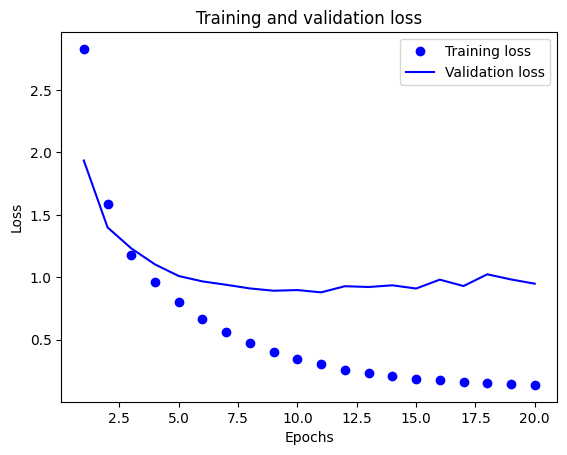

In [7]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

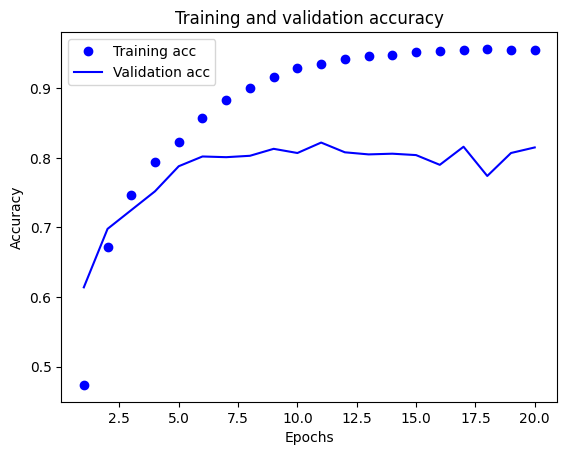

In [8]:
# 绘制训练精度和验证精度
plt.clf()  # 清空图像
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()